In [1]:
import qiskit
qiskit.__qiskit_version__
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer
from qiskit import execute

#print(Aer.backends()) # ou de man
backend_list  = Aer.backends()
for be in backend_list:
    print(be)
backend = Aer.get_backend('qasm_simulator')

AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
QasmSimulator('qasm_simulator')
StatevectorSimulator('statevector_simulator')
UnitarySimulator('unitary_simulator')


Exercice 1
1)On reformule le problème de couverture minimal 
$$ min \sum_{i,j \in E} x_{ij}$$
sc $\begin{cases}
 pour \quad tout \quad v \in V, \sum_{k \in V} x_{vk} >=1 \\
 et \quad pour \quad tout \quad (i,j) \in E,x_{ij} \in[[0,1]]
\end{cases}$

Exercice 2

On a pc(x)=0 satisfait la contrainte C et pc(x)>0 sinon
On note C=$ v \in V, \sum_{k \in V} x_{vk} >=1$  
Ainsi $-\sum_{k \in V} x_{vk} <=-1$  
$-\sum_{k \in V} x_{vk} +1 <=0$  
Ainsi on obtient
$$g_{v}(x) = (-\sum_{k \in V} x_{vk})+1$$  
On veut
$$
pv(x) = 
\begin{cases} 
0 & \text{si } g_{v}(x)  \leq 0 \\
>0 & \text{si } g_{v}(x) > 0 
\end{cases}
$$
Donc  
$$
pv(x) = 
\begin{cases} 
 g_{v}(x) & \text{si } deg(v)=1   \\
 g_{v}(x)+x_{vk1}x_{vk2}  & \text{si } deg(v)=2 
\end{cases}
$$
Ainsi on a
$$
pv(x) = 
\begin{cases} 
 -x_{vk}+1 & \text{si } deg(v)=1   \\
 -x_{vk1}-x_{vk2}+1+x_{vk1}x_{vk2}  & \text{si } deg(v)=2 
\end{cases}
$$  
Voici le signe des coefficients de pénalités
$min \sum_{i,j \in E} x_{ij} + \sum_{v,i \in V^{2}} \lambda_{v}(-x_{vi}+1) + \sum_{v,i,j \in V^{3}} \lambda_{v}(-x_{vi}-x_{vj}+1+x_{vi}+x_{vj})$  
donc on pose $z_{i} = 1-2x_{i}$  
Donc $ \sum_{i,j \in E} \frac{1-z_{ij}}{2} + \sum_{v,i \in V^{2}} \lambda_{v}(\frac{z_{ij}-1}{2}+1) + \sum_{v,i,j \in V^{3}} \lambda_{v}(\frac{z_{ij}-1}{2}+\frac{z_{ij}-1}{2}+1+\frac{(1-z_{vi})(1-z_{vj})}{4})$  
Finalement on a Hp=$ \sum_{i,j \in E} \frac{(1-2\lambda_{v})(1-Z_{ij})}{2} + n*\lambda_{v} + \sum_{v,i,j \in V^{3}} \lambda_{v}(\frac{1-Z_{vi}-Z_{vj}+Z_{vi}Z_{vj}}{4})$  



In [48]:
from qiskit_optimization import QuadraticProgram

import math
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt 
from qiskit.visualization import plot_histogram
from qiskit.algorithms.minimum_eigensolvers import QAOA
from qiskit.algorithms.optimizers import COBYLA
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.primitives import Sampler

# Constant
lamba = 10
sampler = Sampler()
qubo=QuadraticProgram()
#definebinary variables
qubo.binary_var('x12')
qubo.binary_var('x13')
qubo.binary_var('x23')
qubo.binary_var('x45')
qubo.binary_var('x56')
qubo.binary_var('x67')
#qubo minimize
qubo.minimize(constant=7*lamba,linear=[1-2*lamba,1-2*lamba,1-2*lamba,1-2*lamba,1-2*lamba,1-2*lamba], quadratic={('x12','x13'):lamba,('x12','x23'):lamba,('x13','x23'):lamba,('x45','x56'):lamba,('x56','x67'):lamba})
qaoa_mes = QAOA(sampler=sampler ,optimizer=COBYLA(),reps=3)
qaoa = MinimumEigenOptimizer(qaoa_mes)
result = qaoa.solve(qubo)
print(result)


fval=4.0, x12=1.0, x13=1.0, x23=0.0, x45=1.0, x56=0.0, x67=1.0, status=SUCCESS


Exercice 3
1)Le problème de décision associé est
$$x \in X \quad tq \quad \sum_{(i,j) \in E} x_{ij} \le k \quad avec \quad pour \quad tout \quad v \in V,\sum_{k} x_{vk} \ge 1$$


Nous voulons construire l'algorithme de grover
Ainsi on cherche à construire l'algorithme de Grover donc on définit f tel que 
$$
f =
\begin{cases}
1 & \text{si } \sum_{(i,j) \in E} x_{ij}  \leq k \\
0 & \text{sinon }  
\end{cases}
$$
On fait de même pour la deuxième condition

Nous allons traduire notre condition en porte
Ainsi l'oracle aura besoin de 

c:\Users\aurel\.conda\envs\deeplearning\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


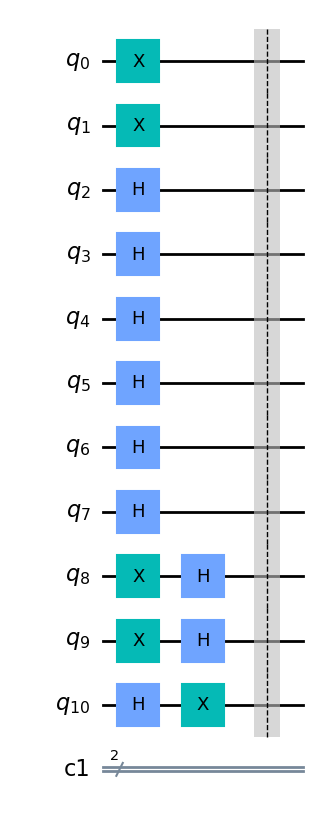

In [46]:
#algo de grover
q = QuantumRegister(32,'q')
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
#Initialisation des q bits pour k
qc.x(q[6])
qc.x(q[7])
#Initial des qbits pour l'algo de grover
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.h(q[4])
qc.h(q[5])
#flag
qc.x(q[8])
qc.x(q[9])
qc.h(q[8])  
qc.h(q[9])
qc.h(q[10])
qc.x(q[10])
qc.barrier()
#oracle 1
#adder1
qc.cx(q[0],q[11])
qc.cx(q[1],q[11])
qc.cx(q[32],q[11])#11 est Sum
qc.ccx(q[0],q[1],q[12])
qc.ccx(q[0],q[32],q[12])
qc.ccx(q[1],q[32],q[12])
#adder2
qc.cx(q[2],q[13])
qc.cx(q[3],q[13])
qc.cx(q[32],q[13])
qc.ccx(q[2],q[3],q[14])
qc.ccx(q[2],q[32],q[14])
qc.ccx(q[1],q[32],q[14])
#adder3
qc.cx(q[4],q[15])
qc.cx(q[5],q[15])
qc.cx(q[32],q[15])
qc.ccx(q[4],q[5],q[16])
qc.ccx(q[4],q[32],q[16])
qc.ccx(q[5],q[32],q[16])
#Ne pas oublier q6

qc.draw(output='mpl')


On peut réaliser la méthode de brut force de pour résoudre la couverture minimal
Soit E un graphe et V l'enseble de ses sommets
On fait
Si |E|=0
Si |E| ≥ k × |V | retourner FAUX
Prendre une arête e = xy de G,
et retourner VC_BF(G − {x}, k − 1)∨ VC_BF(G − {y}, k − 1)
On fait tourner l'algo jusque ce que ce soit vide